# Library imports

In [5]:
#library imports 
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'
# Setting seaborn style
sns.set()

# Reading the Data

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/catamina07/datamining-group/64d5edb1e1a39716e570308abb8b803f43144806/data/DM_AIAI_FlightsDB.csv')
df.head(10)

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
0,413052,2021,12,12/1/2021,2.0,2.0,9384.0,938.0,0.0,0.0
1,464105,2021,12,12/1/2021,0.0,0.0,0.0,0.0,0.0,0.0
2,681785,2021,12,12/1/2021,10.0,3.0,14745.0,1474.0,0.0,0.0
3,185013,2021,12,12/1/2021,16.0,4.0,26311.0,2631.0,3213.0,32.0
4,216596,2021,12,12/1/2021,9.0,0.0,19275.0,1927.0,0.0,0.0
5,486956,2021,12,12/1/2021,12.0,7.0,23967.0,2396.0,0.0,0.0
6,247514,2021,12,12/1/2021,17.0,7.0,23029.0,2302.0,0.0,0.0
7,711864,2021,12,12/1/2021,6.0,0.0,25995.0,2599.0,0.0,0.0
8,721372,2021,12,12/1/2021,11.0,3.0,30758.0,3075.0,0.0,0.0
9,762715,2021,12,12/1/2021,0.0,0.0,0.0,0.0,0.0,0.0


# Metadata
- *id* - The unique identifier of the customer
- *Loyalty* - Unique customer identifier linking to CustomerDB
- *Year* - Year of flight activity record
- *Month* -	Month of flight activity record (1-12)
- *YearMonthDate* -	First day of the month for the activity period
- *NumFlights* -	Total number of flights taken by customer in the month
- *NumFlightsWithCompanions* -	Number of flights where customer traveled with companions
- *DistanceKM* -	Total distance traveled in kilometers for the month
- *PointsAccumulated* -	Loyalty points earned by customer during the month
- *PointsRedeemed* -	Loyalty points spent/redeemed by customer during the month
- *DollarCostPointsRedeemed* -	Dollar value of points redeemed during the month


# Checking missing values

In [7]:
df.replace("", np.nan, inplace=True)
df.isna().sum()

Loyalty#                    0
Year                        0
Month                       0
YearMonthDate               0
NumFlights                  0
NumFlightsWithCompanions    0
DistanceKM                  0
PointsAccumulated           0
PointsRedeemed              0
DollarCostPointsRedeemed    0
dtype: int64

No missing values on this data part

# Is there is any duplicates?

In [8]:
df.duplicated().sum()

np.int64(2903)

oh no there is duplicates, i will eliminate them on this part

In [9]:
df2 = df.drop_duplicates()

In [10]:
df.shape

(608436, 10)

In [11]:
df2.shape

(605533, 10)

In [12]:
608436-605533

2903

2903 eliminated cause it was duplicates

# Initial Analysis

In [13]:
df2.shape

(605533, 10)

605533 rows and 10 variables

In [14]:
df2.columns

Index(['Loyalty#', 'Year', 'Month', 'YearMonthDate', 'NumFlights',
       'NumFlightsWithCompanions', 'DistanceKM', 'PointsAccumulated',
       'PointsRedeemed', 'DollarCostPointsRedeemed'],
      dtype='object')

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 605533 entries, 0 to 608435
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loyalty#                  605533 non-null  int64  
 1   Year                      605533 non-null  int64  
 2   Month                     605533 non-null  int64  
 3   YearMonthDate             605533 non-null  object 
 4   NumFlights                605533 non-null  float64
 5   NumFlightsWithCompanions  605533 non-null  float64
 6   DistanceKM                605533 non-null  float64
 7   PointsAccumulated         605533 non-null  float64
 8   PointsRedeemed            605533 non-null  float64
 9   DollarCostPointsRedeemed  605533 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 50.8+ MB


- We don't have any null count. What does that mean? that we have null values
- Dytype:
    - int64
    - object
    - float64

In [16]:
df2.dtypes

Loyalty#                      int64
Year                          int64
Month                         int64
YearMonthDate                object
NumFlights                  float64
NumFlightsWithCompanions    float64
DistanceKM                  float64
PointsAccumulated           float64
PointsRedeemed              float64
DollarCostPointsRedeemed    float64
dtype: object

In [17]:
df2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loyalty#,605533.0,NaN,NaN,NaN,549849.322158,258966.799122,100018.0,326603.0,550575.0,772152.0,999986.0
Year,605533.0,NaN,NaN,NaN,2020.000467,0.816593,2019.0,2019.0,2020.0,2021.0,2021.0
Month,605533.0,NaN,NaN,NaN,6.501362,3.451962,1.0,4.0,7.0,10.0,12.0
YearMonthDate,605533,36,10/1/2021,16846,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumFlights,605533.0,NaN,NaN,NaN,3.926843,5.062737,0.0,0.0,0.9,7.2,21.0
NumFlightsWithCompanions,605533.0,NaN,NaN,NaN,0.988662,2.007421,0.0,0.0,0.0,1.0,11.0
DistanceKM,605533.0,NaN,NaN,NaN,7977.403603,10270.215544,0.0,0.0,993.6,15408.9,42040.0
PointsAccumulated,605533.0,NaN,NaN,NaN,797.58325,1026.897996,0.0,0.0,99.0,1540.71,4204.0
PointsRedeemed,605533.0,NaN,NaN,NaN,236.379504,985.452175,0.0,0.0,0.0,0.0,7496.0
DollarCostPointsRedeemed,605533.0,NaN,NaN,NaN,2.335981,9.747117,0.0,0.0,0.0,0.0,74.0


Small analysis of the descriptive statistics:
- *Loyalty#* - No statistics analysis important cause its just a unique identifier of the customer.
- *Year* - the data that we have is between 2019 and 2021 (3 years of data, pandemic years (maybe it will be interesting)). Flights divided equally (mean and median being the same we can assume that every year as same amount of data).
- *Month* - the data is uniform since the mean and the median is almost equal, no interesting analysis about this.
- *NumFlights* - median = 0.9 -> most of the costumers don't fly once a month but the 3quartile  being 7.2 flights means that there is some loyal costumers flying more then once a month. It shows a really accentuated right asymmetry.
- *NumFlightsWithCompanions* - most of the costumers don't flight with companions, the 3quartile shows it being still 1.
- *DistanceKM* - 50% of the costumers don't flights that often, since median is only 993.6. On other side, the mean being 7977.40 shows that there is still some costumers flying often, in basic terms the data is divided by most of the costumers flying small durations and the costumers that fly more often.
- *PointsAccumulated* - most of the costumers don't accumulated points, once again the median is really low 99.0 but we have some loyal costumers since the 3percentile is $\approx$ 1533. That explains the high mean of $\approx$ 1026.89.
- *PointsRedeemed* and *DollarCostPointsRedeemed* - the costumers only redeemed high quantities of points (interesting to analyze in the future). There is a huge right asymmetry.


In [18]:
df2.describe(include='object')

,YearMonthDate
count,605533
unique,36
top,10/1/2021
freq,16846


36 diferent days (12 months * 3 years)

In [19]:
df2.describe(include="all").T #basically the same as we already saw

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loyalty#,605533.0,NaN,NaN,NaN,549849.322158,258966.799122,100018.0,326603.0,550575.0,772152.0,999986.0
Year,605533.0,NaN,NaN,NaN,2020.000467,0.816593,2019.0,2019.0,2020.0,2021.0,2021.0
Month,605533.0,NaN,NaN,NaN,6.501362,3.451962,1.0,4.0,7.0,10.0,12.0
YearMonthDate,605533,36,10/1/2021,16846,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumFlights,605533.0,NaN,NaN,NaN,3.926843,5.062737,0.0,0.0,0.9,7.2,21.0
NumFlightsWithCompanions,605533.0,NaN,NaN,NaN,0.988662,2.007421,0.0,0.0,0.0,1.0,11.0
DistanceKM,605533.0,NaN,NaN,NaN,7977.403603,10270.215544,0.0,0.0,993.6,15408.9,42040.0
PointsAccumulated,605533.0,NaN,NaN,NaN,797.58325,1026.897996,0.0,0.0,99.0,1540.71,4204.0
PointsRedeemed,605533.0,NaN,NaN,NaN,236.379504,985.452175,0.0,0.0,0.0,0.0,7496.0
DollarCostPointsRedeemed,605533.0,NaN,NaN,NaN,2.335981,9.747117,0.0,0.0,0.0,0.0,74.0


#  Checking the high points redeemed costumers

In [20]:
df2.loc[df2['DollarCostPointsRedeemed'] > (50)].describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty#,6351.0,554473.065974,259573.047098,100018.00,330040.000,557752.0,777325.50,999986.0
Year,6351.0,2020.194930,0.773037,2019.00,2020.000,2020.0,2021.00,2021.0
Month,6351.0,7.288459,2.420696,3.00,6.000,7.0,8.00,12.0
NumFlights,6351.0,9.388380,5.095118,0.90,5.000,9.0,13.00,21.0
NumFlightsWithCompanions,6351.0,4.489466,2.532218,0.00,2.000,4.0,6.00,11.0
DistanceKM,6351.0,18162.277563,10685.864095,358.20,8910.050,18053.1,27010.50,41895.0
PointsAccumulated,6351.0,1815.877245,1068.584864,35.82,890.955,1805.0,2701.00,4189.0
PointsRedeemed,6351.0,5815.332955,559.248741,5040.00,5350.000,5703.3,6180.15,7496.0
DollarCostPointsRedeemed,6351.0,57.681483,5.587644,50.40,53.000,56.7,61.00,74.0


The people that redeemed at least 50 dollars per month are the ones that fly  more flights per month since the mean is $\approx$ 7.29 flights per month. So we can assume that the loyaler costumers are the ones using the points redeemed system. They take more companions too since at least 25% of the people that redeemed at least 50 dollars per month are taking at least more 4 people. (they fly more they accumulate more points and probably they are using the companions to get more points (probably a promotion))

#   Checking the costumers that actually do fly

In [21]:
df2.loc[df2['NumFlights'] > 0].shape


(303912, 10)

In [22]:
605533-303912

301621

Almost half of the costumers data set didn't fly in this 3 years!

In [23]:
df2.loc[df2['NumFlights'] > 0].describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty#,303912.0,549006.106968,258296.280653,100018.00,326699.00,549551.50,771667.0,999986.0
Year,303912.0,2020.049593,0.825070,2019.00,2019.00,2020.00,2021.0,2021.0
Month,303912.0,6.644960,3.449283,1.00,4.00,7.00,10.0,12.0
NumFlights,303912.0,7.824084,4.536193,0.90,4.00,7.20,11.0,21.0
NumFlightsWithCompanions,303912.0,1.969870,2.469060,0.00,0.00,0.90,3.6,11.0
DistanceKM,303912.0,15588.317563,9354.323646,238.50,7796.70,15058.00,22565.0,42040.0
PointsAccumulated,303912.0,1558.524642,935.417209,23.85,779.04,1505.52,2256.0,4204.0
PointsRedeemed,303912.0,470.977092,1350.712430,0.00,0.00,0.00,0.0,7496.0
DollarCostPointsRedeemed,303912.0,4.654352,13.360619,0.00,0.00,0.00,0.0,74.0


Interesting points:
- *NumFlights* - the people that actually flight every month are flying in mean $\approx$ 7,82. 
- *PointsAccumulated* - when we take out the costumers that don't fly we can notice that the costumers do actually accumulate points being the mean $\approx$ 1558.52, comparing with the mean of $\approx$ 85 with no fliers.
- *PointsRedeemed* and *DollarCostPointsRedeemed* - they continue really low so we can conclude that the costumers are nor using the sistement in their favor (maybe something is not working good).

# Histogram of the distribution os the number of flights per month

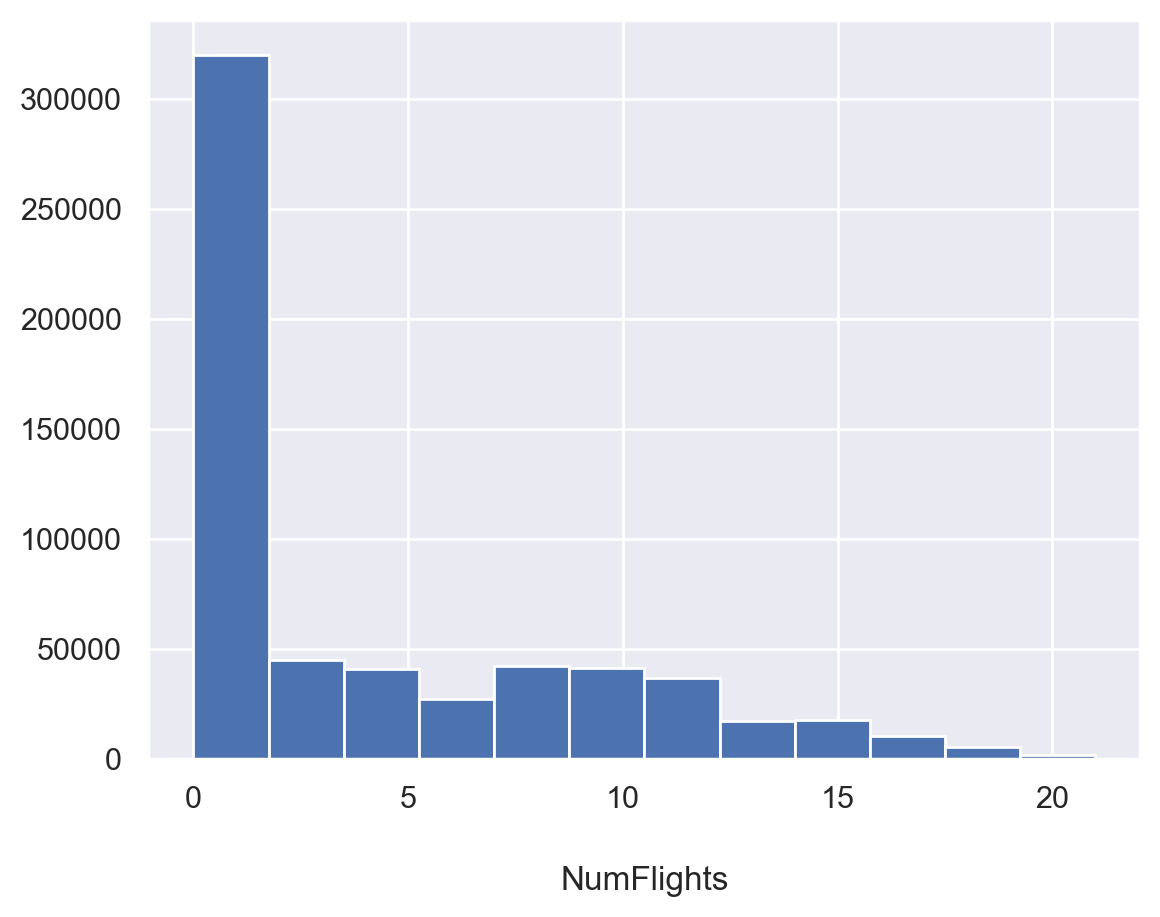

In [24]:
plt.hist(df2['NumFlights'], bins=12)
plt.title("NumFlights", y=-0.2)

plt.show()

It looks like a exponential. Like we saw, the costumers normally fly lest the one per month.

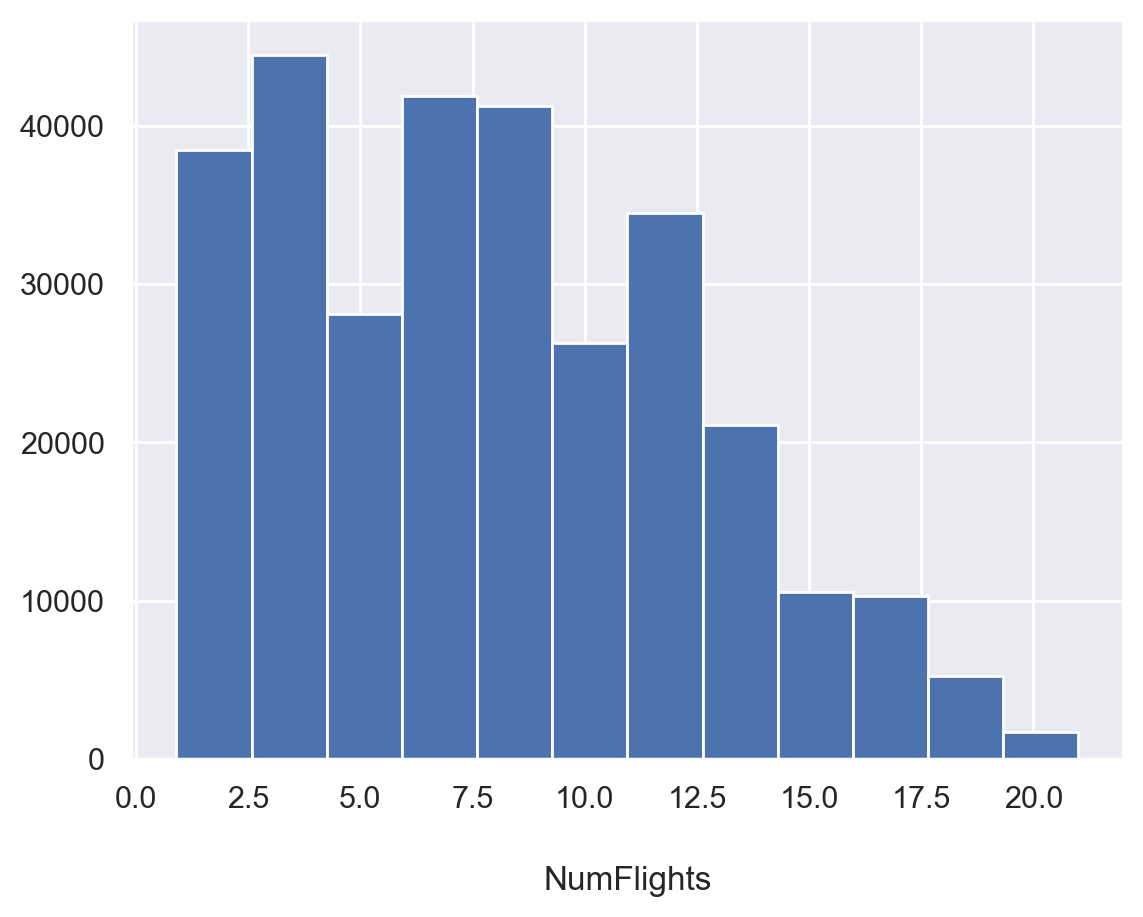

In [25]:
plt.hist(df2.loc[df2['NumFlights'] > 0, 'NumFlights'], bins=12)
plt.title("NumFlights", y=-0.2)
plt.show()

# Checking the correlations

In [26]:
non_metric_features = ['YearMonthDate']
metric_features = df.columns.drop(non_metric_features).to_list()

######## OR ########

In [27]:
df2[metric_features].corr()

,Loyalty#,Year,Month,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
Loyalty#,1.000000,0.000323,0.000175,-0.002093,-0.003262,-0.002363,-0.002363,0.000689,0.000699
Year,0.000323,1.000000,-0.000022,0.068696,0.038227,0.078328,0.078237,0.024397,0.024377
Month,0.000175,-0.000022,1.000000,0.076518,0.057650,0.065348,0.065350,0.020329,0.020416
NumFlights,-0.002093,0.068696,0.076518,1.000000,0.506650,0.615470,0.615425,0.190857,0.190800
NumFlightsWithCompanions,-0.003262,0.038227,0.057650,0.506650,1.000000,0.392353,0.392324,0.335402,0.335259
DistanceKM,-0.002363,0.078328,0.065348,0.615470,0.392353,1.000000,1.000000,0.188284,0.188198
PointsAccumulated,-0.002363,0.078237,0.065350,0.615425,0.392324,1.000000,1.000000,0.188269,0.188183
PointsRedeemed,0.000689,0.024397,0.020329,0.190857,0.335402,0.188284,0.188269,1.000000,0.999971
DollarCostPointsRedeemed,0.000699,0.024377,0.020416,0.190800,0.335259,0.188198,0.188183,0.999971,1.000000


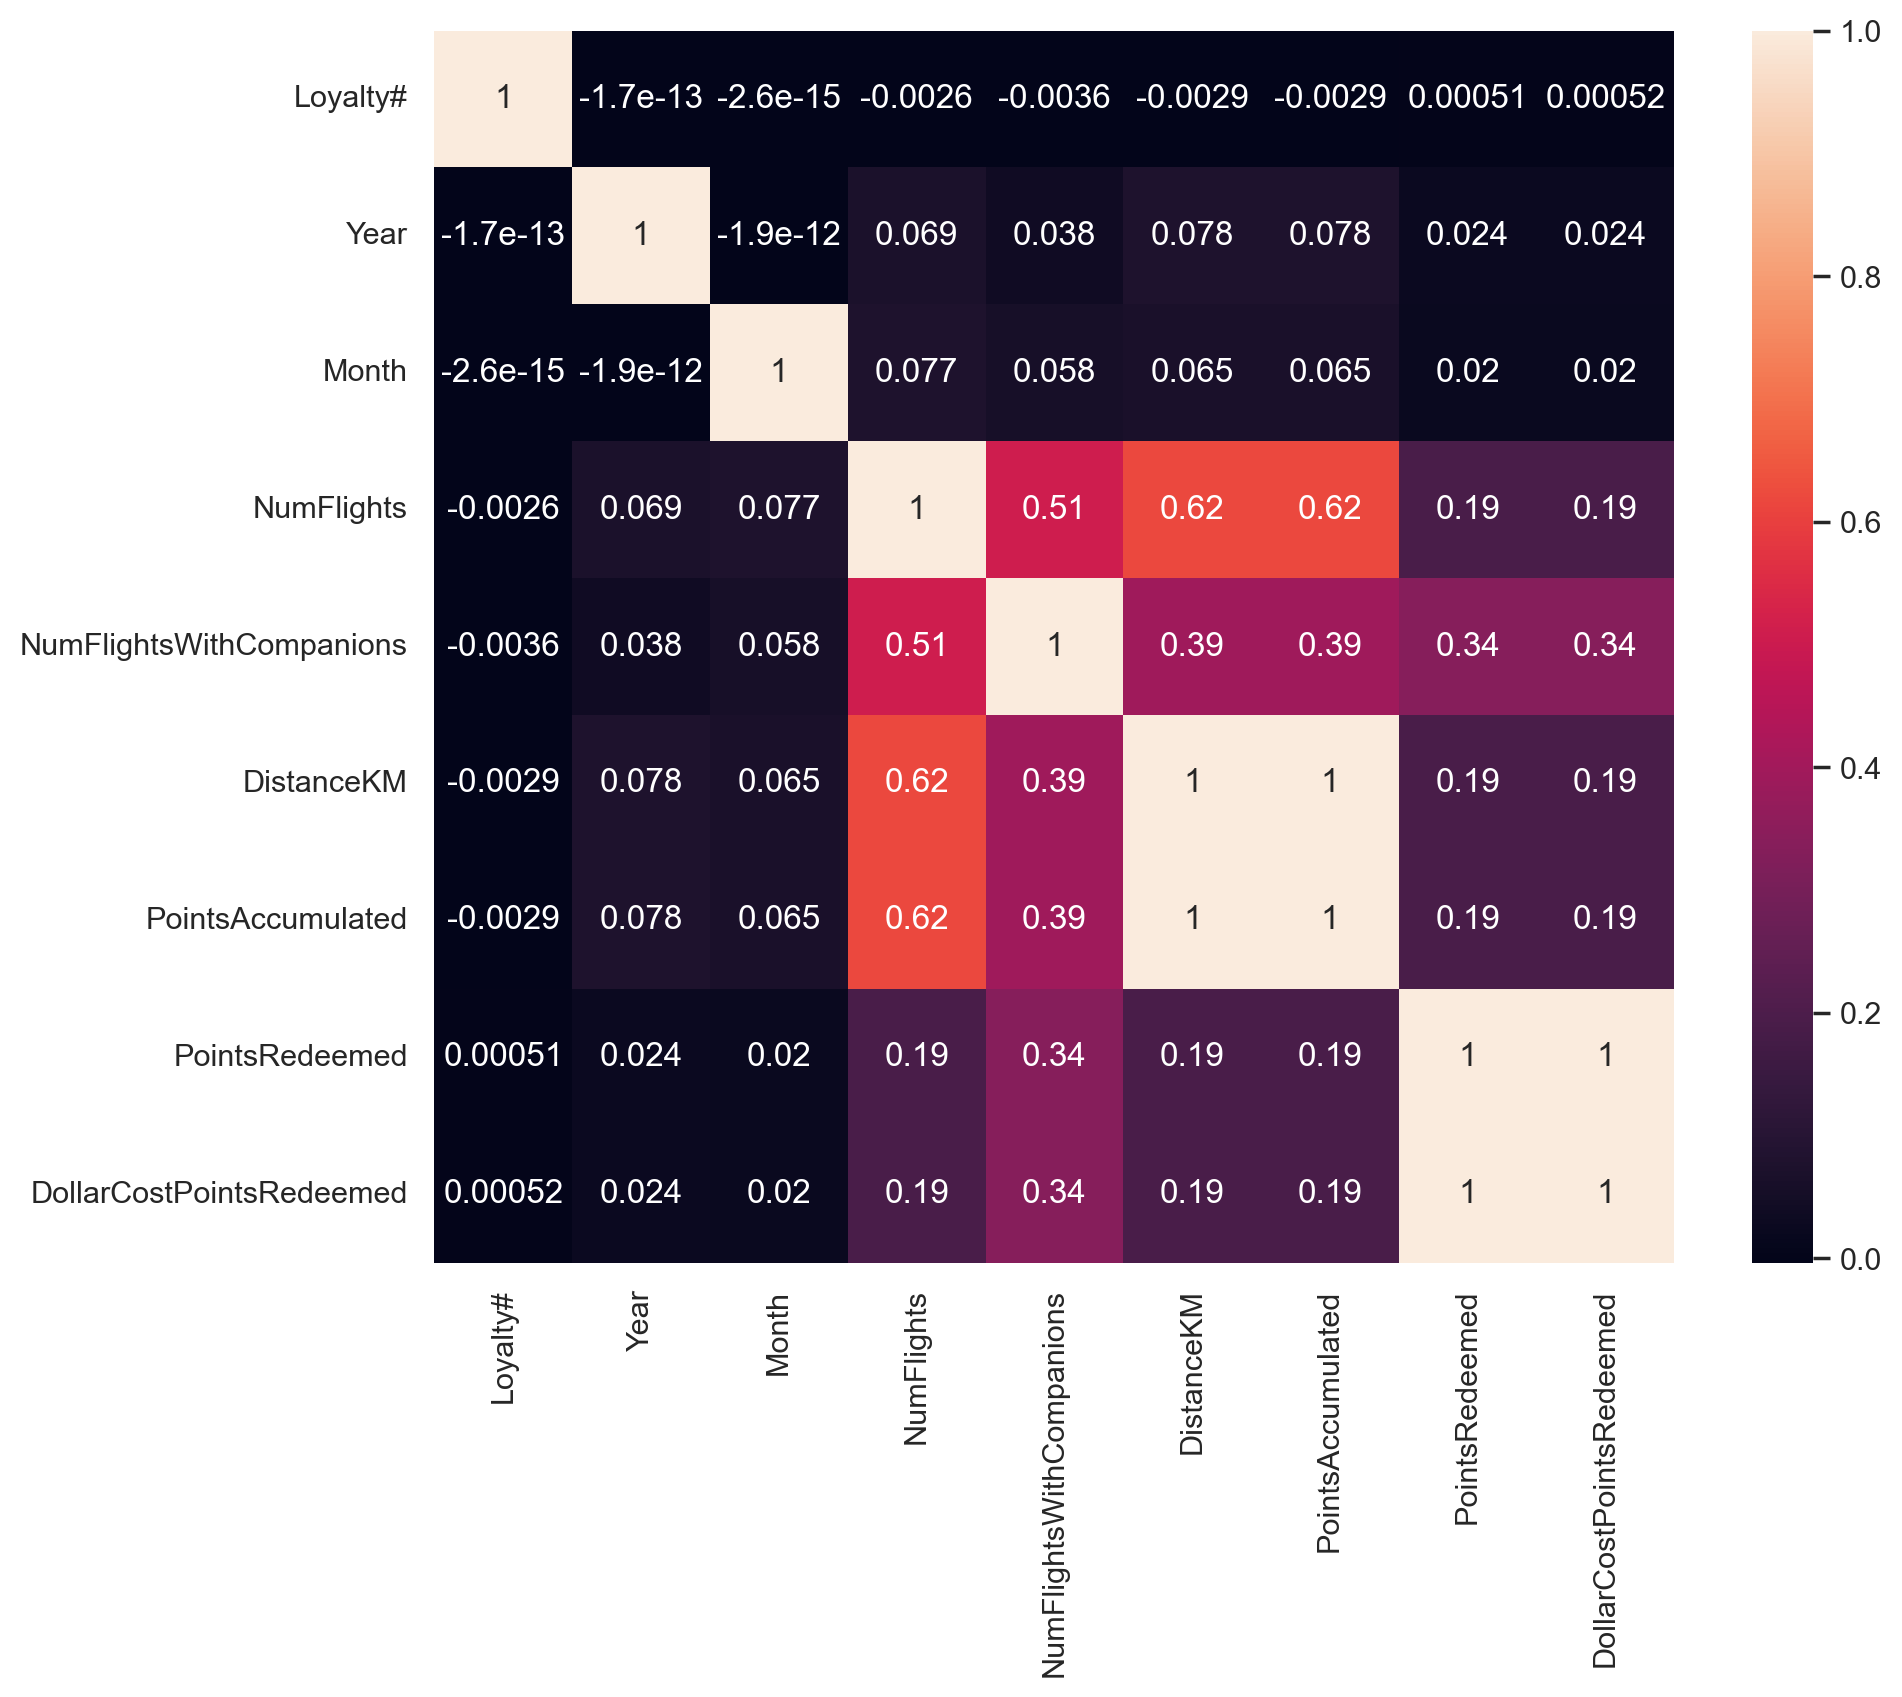

In [28]:
corr = df[metric_features].corr(method="pearson")

fig = plt.figure(figsize=(10, 8))

####
sns.heatmap(data=corr, annot=True, )
####

plt.show()

There is not that much correlations, the only interesting one is the points accumulated with the distance so we ca take out that the points you get is relacioneted with the distance you fly.
The other interesting one that we can also assume tha there is a relation is the points accumulated and the number of flights, the same with the distance.

# Boxplot

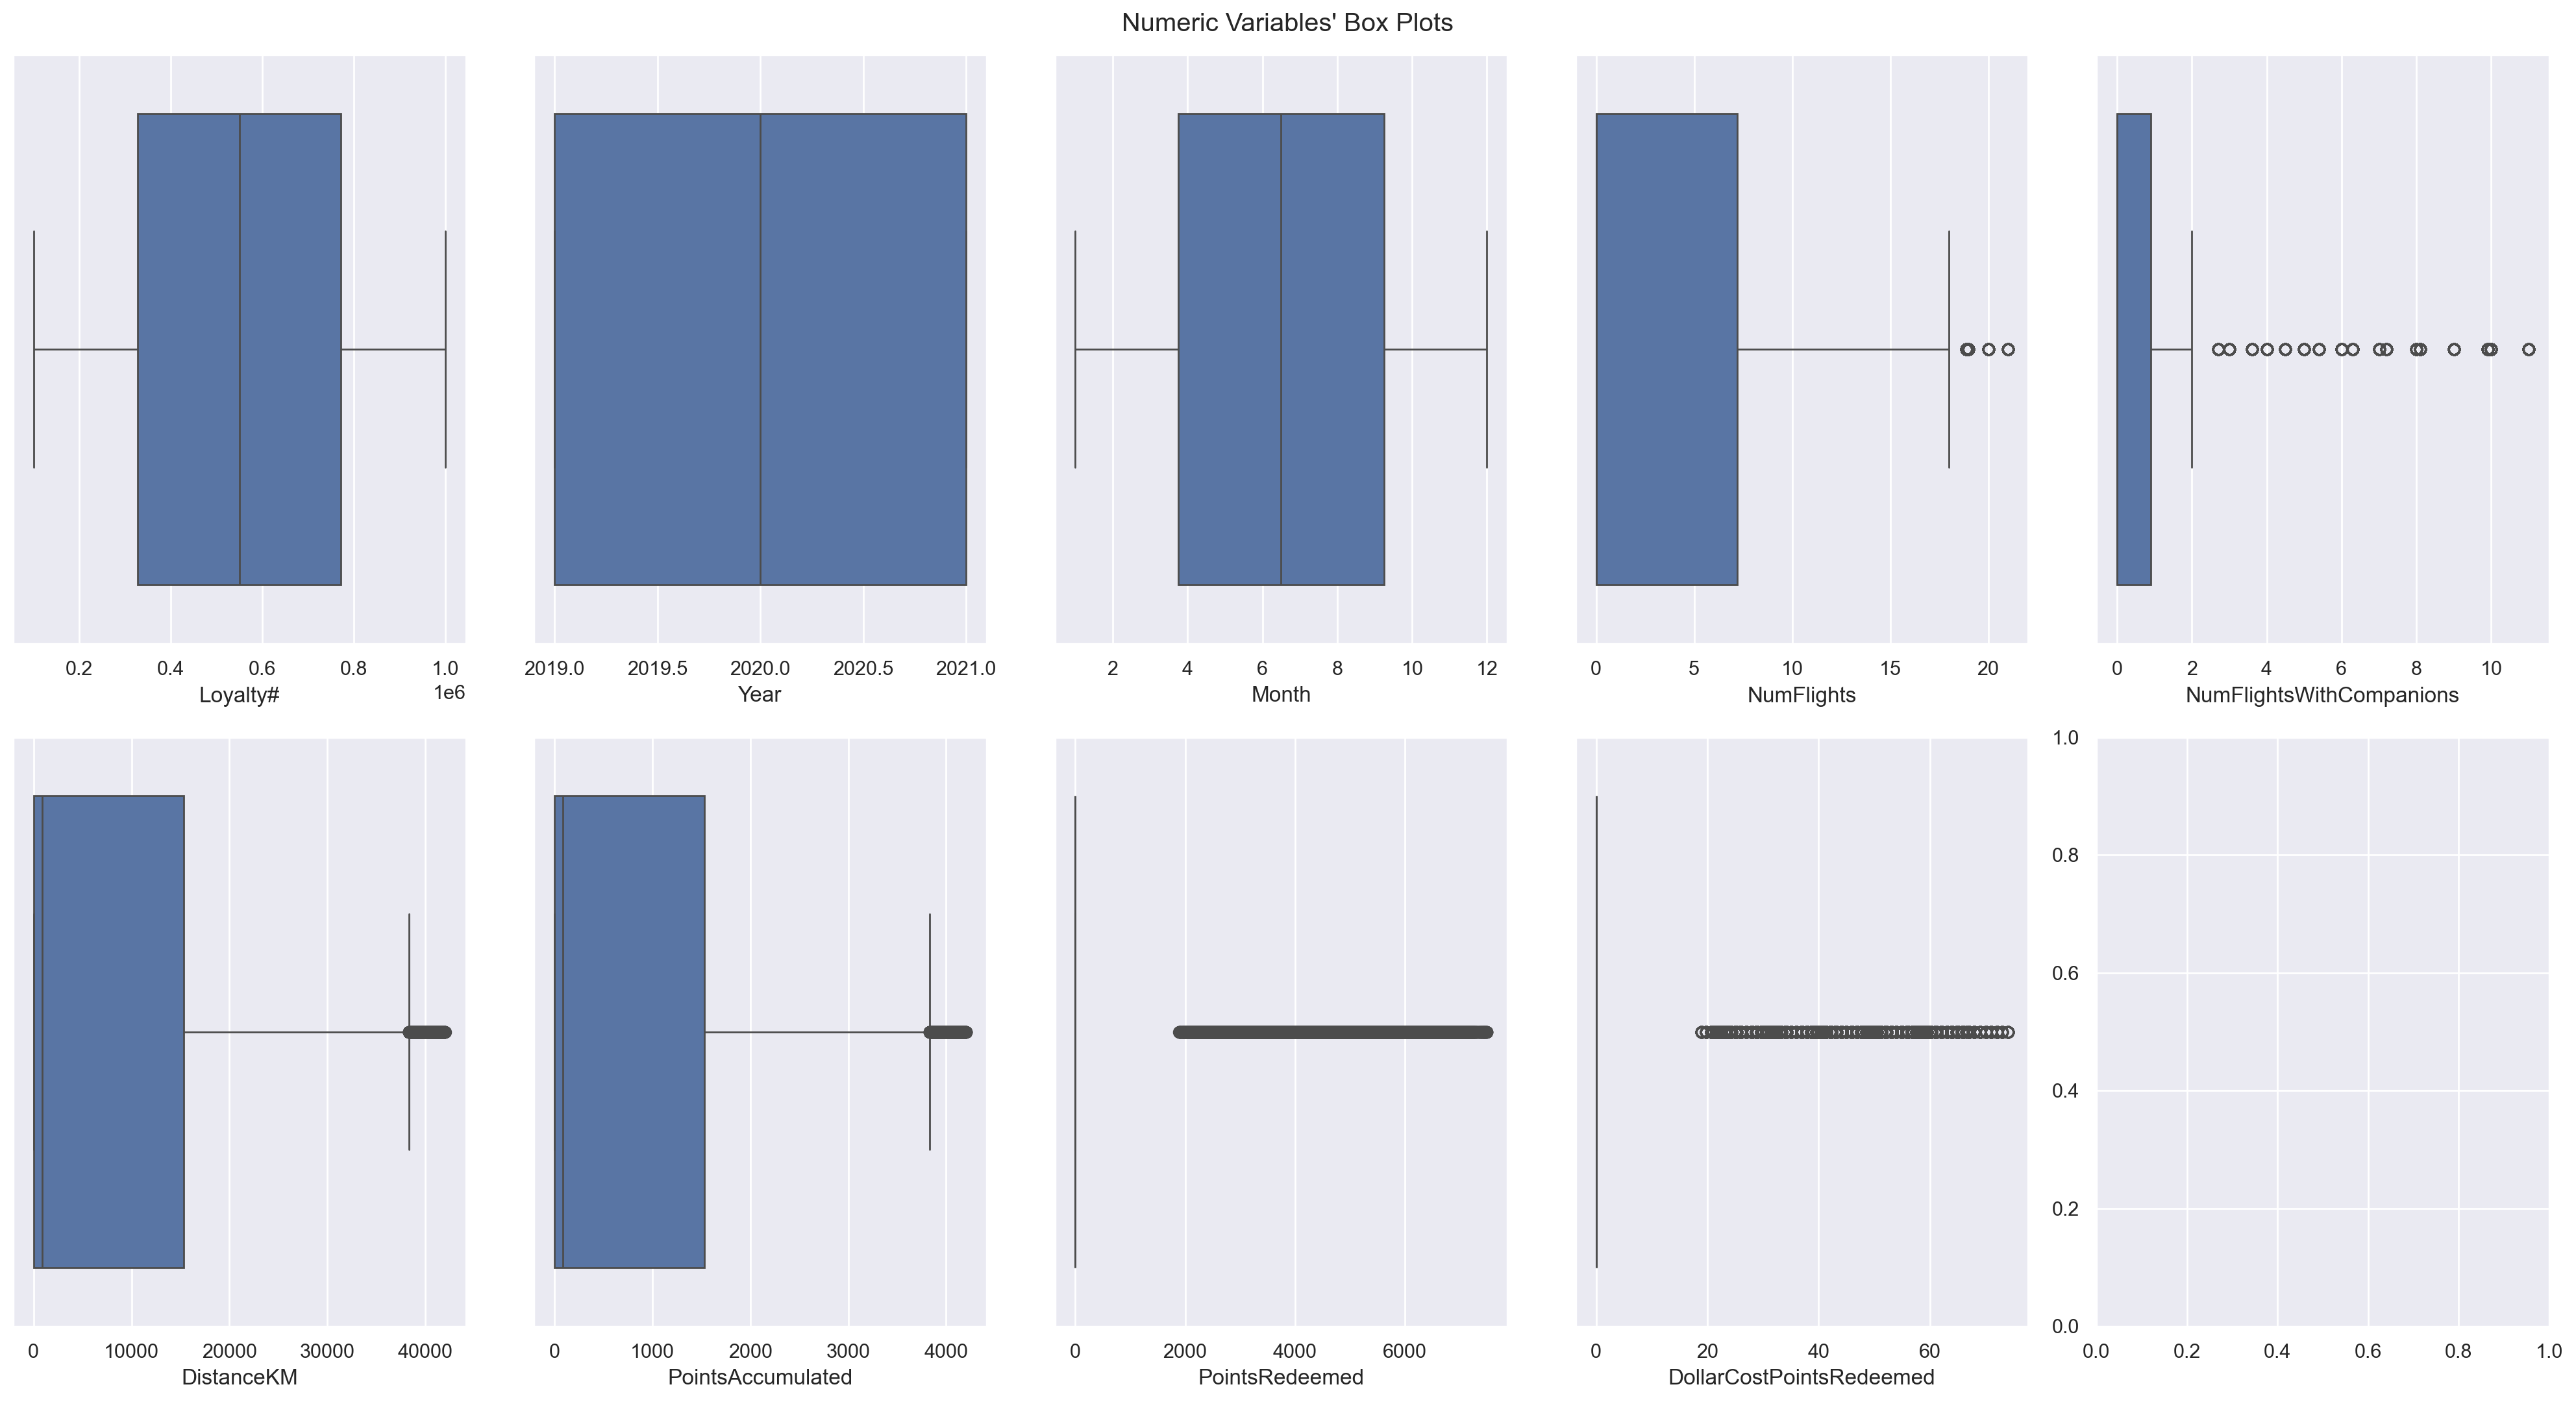

In [29]:
# Plot ALL Numeric Variables' Histograms in one figure

sns.set() ## Reset to darkgrid

## What do these do?
sp_rows = 2
sp_cols = ceil(len(metric_features) / sp_rows)


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=df[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    # if the eda directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'eda'))


plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_boxplots.png'), dpi=200)


plt.show()

We only don't have outliers in the variables `Loyalty#`, `Year` and `Month`.
The variables `PointsRedeemed` and ´DollarCostPointsRedeemed` are similar (only one variable needed of this ones).